In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [ ]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################

(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 15s 0us/step
Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

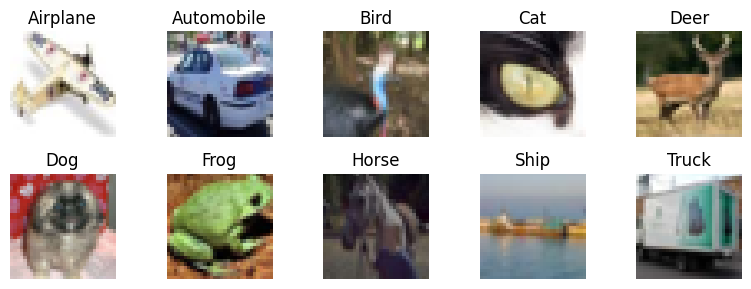

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [ ]:
##################################################
################### YOUR CODES ###################

# normalize the train and validation data
norm_x_train = x_train.astype(float) / 255.
norm_x_val  = x_val.astype(float) / 255.

num_classes = len(class_names)

categorical_y_train = keras.utils.to_categorical(y_train, num_classes)
categorical_y_val = keras.utils.to_categorical(y_val, num_classes)

##################################################

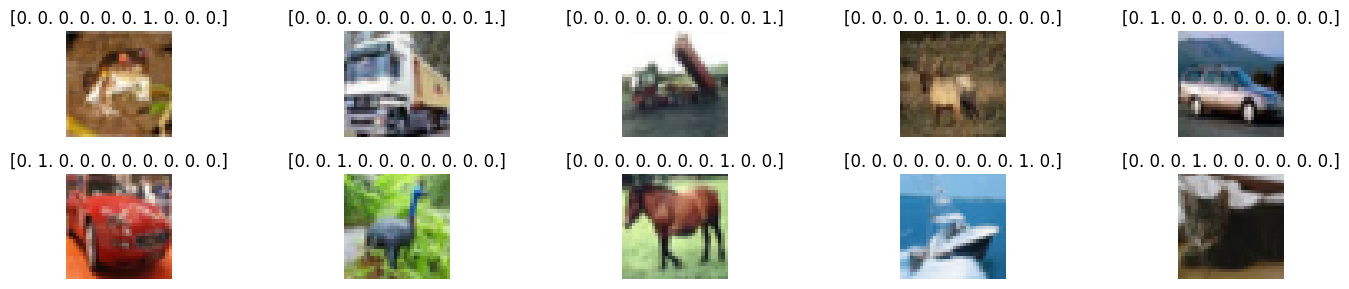

In [ ]:
fig = plt.figure(figsize=(15, 3))

for class_index in range(len(class_names)):
    image = x_train[class_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(str(categorical_y_train[class_index]))
    ax.axis('off')

plt.tight_layout()
plt.show()

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [ ]:
##################################################
################### YOUR CODES ###################
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
##################################################

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 64)               

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [ ]:
##################################################
################### YOUR CODES ###################
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [ ]:
##################################################
################### YOUR CODES ###################
history = model.fit(norm_x_train, categorical_y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(norm_x_val, categorical_y_val))
##################################################

Epoch 1/10
500/500 [==============================] - 5s 7ms/step - loss: 1.6333 - accuracy: 0.4067 - val_loss: 1.4110 - val_accuracy: 0.4858
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 1.2897 - accuracy: 0.5416 - val_loss: 1.2271 - val_accuracy: 0.5681
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 1.1553 - accuracy: 0.5973 - val_loss: 1.1590 - val_accuracy: 0.5844
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 1.0677 - accuracy: 0.6272 - val_loss: 1.1108 - val_accuracy: 0.6162
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.0067 - accuracy: 0.6517 - val_loss: 1.0214 - val_accuracy: 0.6468
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 0.9574 - accuracy: 0.6672 - val_loss: 1.0256 - val_accuracy: 0.6483
Epoch 7/10
500/500 [==============================] - 3s 5ms/step - loss: 0.9157 - accuracy: 0.6827 - val_loss: 1.0306 - val_accuracy: 0.6475
Epoch 

This function plots the `loss` and `accuracy` of your model by the model's history.

In [ ]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

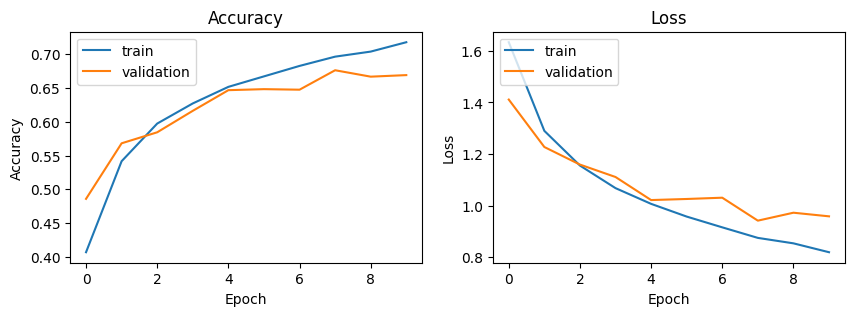

In [ ]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [ ]:
##################################################
################### YOUR CODES ###################

data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=x_train[0].shape))
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Conv2D(64, (5, 5), activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(3,3)))
model2.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(10, activation='softmax'))
##################################################

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 64)               

In [ ]:
augmented_generator = data_augmentation.flow(norm_x_train,categorical_y_train, batch_size=100)

In [ ]:
##################################################
################### YOUR CODES ###################
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##################################################

In [ ]:
##################################################
################### YOUR CODES ###################
history2 = model2.fit(augmented_generator,
                    batch_size=100,
                    epochs=10,
                    validation_data=(norm_x_val, categorical_y_val))
##################################################

Epoch 1/10
500/500 [==============================] - 29s 56ms/step - loss: 1.7343 - accuracy: 0.3665 - val_loss: 1.4806 - val_accuracy: 0.4596
Epoch 2/10
500/500 [==============================] - 27s 53ms/step - loss: 1.4452 - accuracy: 0.4837 - val_loss: 1.3680 - val_accuracy: 0.5127
Epoch 3/10
500/500 [==============================] - 27s 54ms/step - loss: 1.3429 - accuracy: 0.5229 - val_loss: 1.2445 - val_accuracy: 0.5530
Epoch 4/10
500/500 [==============================] - 26s 53ms/step - loss: 1.2823 - accuracy: 0.5494 - val_loss: 1.1822 - val_accuracy: 0.5828
Epoch 5/10
500/500 [==============================] - 27s 54ms/step - loss: 1.2275 - accuracy: 0.5692 - val_loss: 1.1336 - val_accuracy: 0.6003
Epoch 6/10
500/500 [==============================] - 26s 53ms/step - loss: 1.1888 - accuracy: 0.5807 - val_loss: 1.1202 - val_accuracy: 0.6128
Epoch 7/10
500/500 [==============================] - 27s 55ms/step - loss: 1.1656 - accuracy: 0.5928 - val_loss: 1.1003 - val_accuracy:

Let's see your model performance with augmentation.

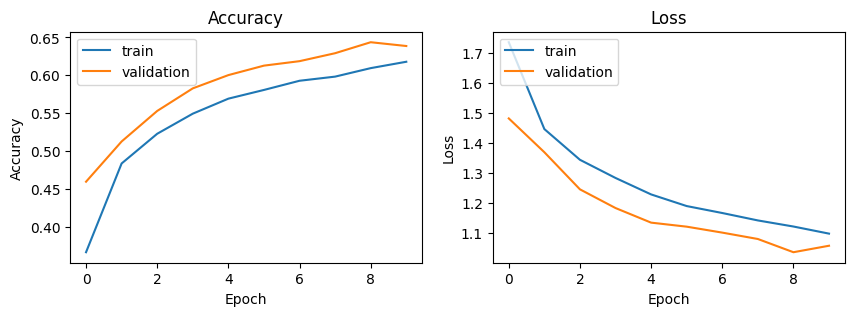

In [ ]:
plot_acc_loss(history2)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

### with normalize train and validation values

In [ ]:
resnet50 = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet50.layers:
    layer.trainable = False

model3 = keras.Sequential()
model3.add(keras.layers.Lambda(lambda img : tf.image.resize(img, (224, 224))))
model3.add(resnet50)
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
history3 = model3.fit(norm_x_train, categorical_y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(norm_x_val, categorical_y_val))

Epoch 1/10
500/500 [==============================] - 194s 375ms/step - loss: 2.6496 - accuracy: 0.2277 - val_loss: 2.0274 - val_accuracy: 0.2774
Epoch 2/10
500/500 [==============================] - 173s 347ms/step - loss: 2.0217 - accuracy: 0.3203 - val_loss: 1.8841 - val_accuracy: 0.3270
Epoch 3/10
500/500 [==============================] - 173s 345ms/step - loss: 1.9075 - accuracy: 0.3514 - val_loss: 2.0728 - val_accuracy: 0.3081
Epoch 4/10
500/500 [==============================] - 185s 371ms/step - loss: 1.8897 - accuracy: 0.3726 - val_loss: 1.6107 - val_accuracy: 0.4332
Epoch 5/10
500/500 [==============================] - 173s 347ms/step - loss: 1.8022 - accuracy: 0.3979 - val_loss: 2.0031 - val_accuracy: 0.3955
Epoch 6/10
500/500 [==============================] - 185s 371ms/step - loss: 1.7246 - accuracy: 0.4150 - val_loss: 1.5847 - val_accuracy: 0.4571
Epoch 7/10
500/500 [==============================] - 186s 372ms/step - loss: 1.7056 - accuracy: 0.4245 - val_loss: 1.7943 -

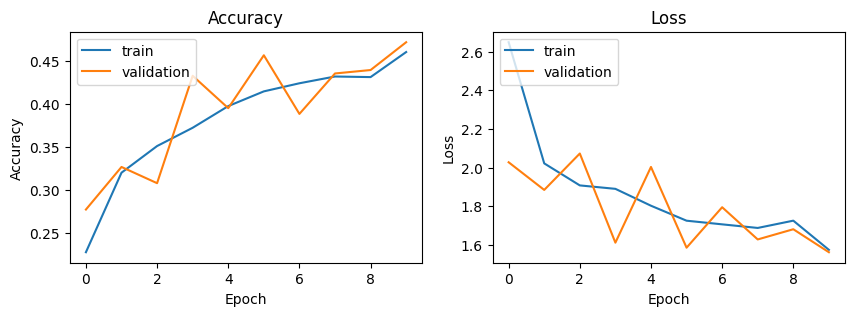

In [ ]:
plot_acc_loss(history3)

### without normalize train and validation values

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Lambda(lambda img : tf.image.resize(img, (224, 224))))
model4.add(resnet50)
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train, categorical_y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, categorical_y_val))

Epoch 1/10
500/500 [==============================] - 204s 400ms/step - loss: 3.6616 - accuracy: 0.7910 - val_loss: 3.5087 - val_accuracy: 0.8282
Epoch 2/10
500/500 [==============================] - 201s 403ms/step - loss: 1.4067 - accuracy: 0.9112 - val_loss: 3.9596 - val_accuracy: 0.8385
Epoch 3/10
500/500 [==============================] - 202s 404ms/step - loss: 0.9374 - accuracy: 0.9393 - val_loss: 4.0950 - val_accuracy: 0.8534
Epoch 4/10
500/500 [==============================] - 210s 420ms/step - loss: 0.5780 - accuracy: 0.9613 - val_loss: 4.6402 - val_accuracy: 0.8567
Epoch 5/10
500/500 [==============================] - 209s 419ms/step - loss: 0.5267 - accuracy: 0.9657 - val_loss: 5.1406 - val_accuracy: 0.8536
Epoch 6/10
500/500 [==============================] - 210s 420ms/step - loss: 0.4997 - accuracy: 0.9697 - val_loss: 6.1439 - val_accuracy: 0.8495
Epoch 7/10
500/500 [==============================] - 210s 420ms/step - loss: 0.5578 - accuracy: 0.9694 - val_loss: 6.1667 -

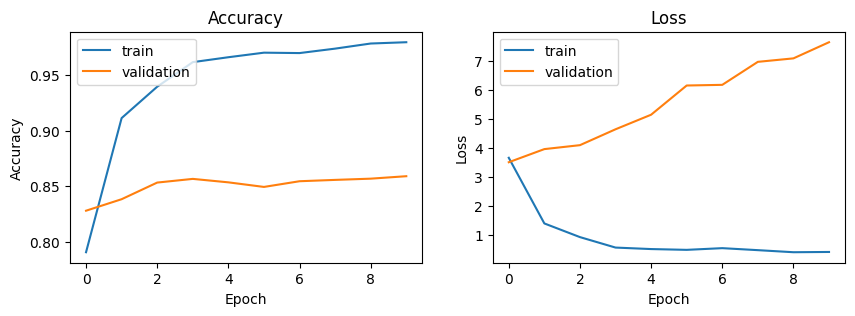

In [ ]:
plot_acc_loss(history4)

## Use only the first three blocks (`extra bonus`)

### with normalize train and validation values

In [ ]:
resnet50_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet50_model.summary(expand_nested=True)

In [ ]:
conv3_output = resnet50_model.get_layer('conv3_block4_out').output
resnet50_model.trainable=False

x = keras.layers.GlobalAveragePooling2D()(conv3_output)
final_model = keras.layers.Dense(10, activation='softmax')(x)
model6 = keras.Model(inputs=resnet50_model.input, outputs=final_model)

model6.summary()

In [ ]:
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history6 = model6.fit(norm_x_train, categorical_y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(norm_x_val, categorical_y_val))

Epoch 1/10
500/500 [==============================] - 13s 21ms/step - loss: 2.3140 - accuracy: 0.1320 - val_loss: 2.2604 - val_accuracy: 0.1095
Epoch 2/10
500/500 [==============================] - 5s 9ms/step - loss: 2.2350 - accuracy: 0.1773 - val_loss: 2.1928 - val_accuracy: 0.2059
Epoch 3/10
500/500 [==============================] - 4s 9ms/step - loss: 2.1784 - accuracy: 0.2244 - val_loss: 2.1538 - val_accuracy: 0.2790
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 2.1369 - accuracy: 0.2503 - val_loss: 2.1223 - val_accuracy: 0.2345
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 2.0984 - accuracy: 0.2689 - val_loss: 2.0722 - val_accuracy: 0.3130
Epoch 6/10
500/500 [==============================] - 4s 9ms/step - loss: 2.0700 - accuracy: 0.2831 - val_loss: 2.0463 - val_accuracy: 0.2768
Epoch 7/10
500/500 [==============================] - 4s 8ms/step - loss: 2.0392 - accuracy: 0.2965 - val_loss: 2.0256 - val_accuracy: 0.2968
Epoc

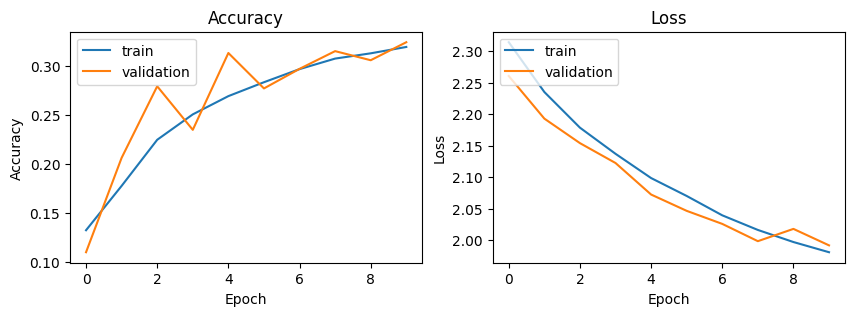

In [ ]:
plot_acc_loss(history6)

### without normalize train and validation values

In [ ]:
conv3_output = resnet50_model.get_layer('conv3_block4_out').output
resnet50_model.trainable=False

x = keras.layers.GlobalAveragePooling2D()(conv3_output)
x = keras.layers.BatchNormalization()(x)
final_model = keras.layers.Dense(10, activation='softmax')(x)
model7 = keras.Model(inputs=resnet50_model.input, outputs=final_model)

model7.summary()

In [ ]:
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history7 = model7.fit(x_train, categorical_y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, categorical_y_val))

Epoch 1/10
500/500 [==============================] - 7s 10ms/step - loss: 1.1465 - accuracy: 0.6045 - val_loss: 0.9279 - val_accuracy: 0.6796
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 0.8932 - accuracy: 0.6905 - val_loss: 0.8632 - val_accuracy: 0.7013
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.8433 - accuracy: 0.7056 - val_loss: 0.8305 - val_accuracy: 0.7109
Epoch 4/10
500/500 [==============================] - 5s 10ms/step - loss: 0.8153 - accuracy: 0.7149 - val_loss: 0.8133 - val_accuracy: 0.7164
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 0.7992 - accuracy: 0.7214 - val_loss: 0.8022 - val_accuracy: 0.7230
Epoch 6/10
500/500 [==============================] - 5s 9ms/step - loss: 0.7845 - accuracy: 0.7263 - val_loss: 0.7969 - val_accuracy: 0.7229
Epoch 7/10
500/500 [==============================] - 5s 10ms/step - loss: 0.7776 - accuracy: 0.7285 - val_loss: 0.7845 - val_accuracy: 0.7260
Epo

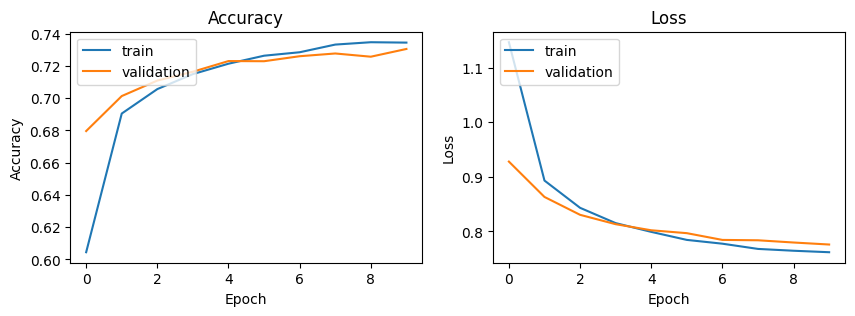

In [ ]:
plot_acc_loss(history7)